# Food Demand Project : Team E (Elephants)

## Topic: We are examining the connection between income growth, consumer demand, and nutritional intake in Tanzania: a case study of the period 2008-2014

## Goals: 

* Complete a holistic analysis of population, health, nutrition, economy, and climate trends in Tanzania, with a comparative study of 2008-2014 datasets.
* Develop a demand model to analyze the relationship between income fluctuations, consumer preferences, and food demand.
* Assess the long-term impacts of nutritional intake and food demand changes in Tanzania, considering future projections such as GDP growth, climate change, and agricultural changes.

## Table of Contents: 
* [(A) Choice of a population, with supporting expenditure data](#population)
* [(A) Estimate Demand System](#demand)

### Setup

In [1]:
!pip install -r requirements.txt

## (A) Choice of a population, with supporting expenditure data <a class="anchor" id="population"></a>

In [2]:
Tanzania_Nutrient_Data = '1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ'
Tanzania_Consumption_Data = '1eRq1SbS5xTBkTzpjxLQLAKQ-j4o5UVp4mhHZSsn8K0M'
Tanzania_Family_Data = '1POplhyd44h-Zt8jMhXa2FGAzS051TPoLa2xMlmvVLU0'
Tanzania_ProcessedFood_Data = '1UaFXpfQsB-VDq4MSVt2e9WoAXqc7Rmam_-u8dvcfleo'

In [3]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets
import warnings
warnings.filterwarnings('ignore')

pd.set_option("max_colwidth", 10)

# Pull Tazania Expenditures from Sheets
x = read_sheets(Tanzania_Family_Data,sheet='Expenditures')
x = x[x['m'] != 'Nan'] #Remove rows with no location
x = x.astype({'i':'int64'}) 
x = x[x.t != '2019-20']
x = x[x.t != '2020-21']


# Reformat Expedentures databases to match structure
x = x.pivot_table(values='value_purchase', index=['i','t','m'], columns=['j'], aggfunc='first')
x = x.replace(0,np.nan) # Replace zeros with missing
x = x.reset_index(level=['m'])
x

Key available for students@eep153.iam.gserviceaccount.com.


j                      m     Beef  Bottled beer  Bread  Butter  \
i     t                                                          
1     2008-09  Mainla...   2500.0        NaN       NaN     NaN   
      2010-11  Mainla...      NaN        NaN       NaN     NaN   
      2012-13  Mainla...   2000.0        NaN       NaN     NaN   
      2014-15  Mainla...      NaN        NaN       NaN     NaN   
2     2008-09  Mainla...   2500.0        NaN       NaN     NaN   
...                  ...      ...        ...       ...     ...   
14980 2014-15  Mainla...   7500.0        NaN       NaN     NaN   
14981 2014-15  Mainla...  10000.0        NaN       NaN     NaN   
14983 2014-15  Mainla...  10000.0        NaN       NaN     NaN   
14984 2014-15  Mainla...   1000.0        NaN       NaN     NaN   
14985 2014-15  Mainla...   5000.0        NaN       NaN     NaN   

j              Canned milk/milk powder  Canned, dried and wild vegetables  \
i     t                                                                     
1     2008-09        NaN                      NaN                           
      2010-11        NaN                      NaN                           
      2012-13        NaN                      NaN                           
      2014-15        NaN                      NaN                           
2     2008-09        NaN                      NaN                           
...                  ...                      ...                           
14980 2014-15        NaN                      NaN                           
14981 2014-15        NaN                      NaN                           
14983 2014-15        NaN                      NaN                           
14984 2014-15        NaN                      NaN                           
14985 2014-15        NaN                      NaN                           

j              Cassava dry/flour  Cassava fresh  Chicken  ...   Sugar  \
i     t                                                   ...           
1     2008-09        NaN                NaN          NaN  ...   600.0   
      2010-11        NaN                NaN          NaN  ...  3150.0   
      2012-13        NaN                NaN          NaN  ...     NaN   
      2014-15        NaN                NaN          NaN  ...  1000.0   
2     2008-09        NaN                NaN          NaN  ...   600.0   
...                  ...                ...          ...  ...     ...   
14980 2014-15        NaN                NaN          NaN  ...  2500.0   
14981 2014-15        NaN                NaN          NaN  ...  4900.0   
14983 2014-15        NaN                NaN          NaN  ...     NaN   
14984 2014-15        NaN                NaN          NaN  ...     NaN   
14985 2014-15        NaN                NaN          NaN  ...  1000.0   

j              Sugarcane  Sweet potatoes  Sweets  Tea (dry)  \
i     t                                                       
1     2008-09        NaN        NaN          NaN       90.0   
      2010-11        NaN        NaN          NaN      300.0   
      2012-13        NaN        NaN          NaN        NaN   
      2014-15     1000.0        NaN          NaN      250.0   
2     2008-09        NaN        NaN          NaN       90.0   
...                  ...        ...          ...        ...   
14980 2014-15        NaN        NaN          NaN      500.0   
14981 2014-15     1500.0        NaN          NaN      700.0   
14983 2014-15        NaN        NaN          NaN        NaN   
14984 2014-15        NaN        NaN          NaN        NaN   
14985 2014-15     1500.0        NaN          NaN      300.0   

j              WHEAT, BARLEY, GRAIN, AND OTHER CEREALS  Wheat (flour)  \
i     t                                                                 
1     2008-09        NaN                                      NaN       
      2010-11        NaN                                      NaN       
      2012-13        NaN                                      NaN       
    

In [4]:
# Use to match round to year structure of Expenditures
t_map = {1: '2008-09', 2:'2010-11', 3: '2012-13', 4:'2014-15'}

# Pull additional processed food expenditures
x_processed = read_sheets(Tanzania_ProcessedFood_Data,sheet='upd4_hh_f.dta') 
x_processed = x_processed.replace({"round": t_map}) # Apply mapping
x_processed = x_processed.rename(columns={'round':'t'})
x_processed = x_processed.set_index(['i','t'])
x_processed.columns.name = 'j'
x_processed

Key available for students@eep153.iam.gserviceaccount.com.


j              Barbequed meat, chips, roast bananas  kibuku, local brews  \
i     t                                                                    
1     2008-09        NaN                                   NaN             
      2010-11        NaN                                   NaN             
      2012-13        NaN                                   NaN             
      2014-15        NaN                                   NaN             
2     2008-09        NaN                                   NaN             
...                  ...                                   ...             
45392 2014-15        NaN                                   NaN             
45393 2014-15        NaN                                   NaN             
45394 2014-15        NaN                                   NaN             
45395 2014-15        NaN                                   NaN             
45396 2014-15        NaN                                   NaN             

j              wine, commercial beer, spirits  \
i     t                                         
1     2008-09        NaN                        
      2010-11        NaN                        
      2012-13        NaN                        
      2014-15        NaN                        
2     2008-09        NaN                        
...                  ...                        
45392 2014-15        NaN                        
45393 2014-15        NaN                        
45394 2014-15        NaN                        
45395 2014-15        NaN                        
45396 2014-15        NaN                        

j              sodas and other non-alcoholic drinks  sweets, ice cream  \
i     t                                                                  
1     2008-09        NaN                                   NaN           
      2010-11        NaN                                   NaN           
      2012-13        NaN                                   NaN           
      2014-15        NaN                                   NaN           
2     2008-09        NaN                                   NaN           
...                  ...                                   ...           
45392 2014-15        NaN                                   NaN           
45393 2014-15        NaN                                   NaN           
45394 2014-15        NaN                                   NaN           
45395 2014-15        NaN                                   NaN           
45396 2014-15        NaN                                   NaN           

j              tea, coffee, samosa, cake  
i     t                                   
1     2008-09        NaN                  
      2010-11        NaN                  
      2012-13        NaN                  
      2014-15        NaN                  
2     2008-09        NaN                  
...                  ...                  
45392 2014-15        NaN                  
45393 2014-15        NaN                  
45394 2014-15        NaN                  
45395 2014-15        NaN                  
45396 2014-15        NaN                  

[83706 rows x 6 columns]

In [5]:
# Merge Processed Food Expenditures with Expenditures sheet
x = pd.merge(x, x_processed, on=['i','t'], how="left")
x = x.reset_index().set_index(['i','t','m'])
x

j                            Beef  Bottled beer  Bread  Butter  \
i     t       m                                                  
1     2008-09 Mainlan...   2500.0        NaN       NaN     NaN   
      2010-11 Mainlan...      NaN        NaN       NaN     NaN   
      2012-13 Mainlan...   2000.0        NaN       NaN     NaN   
      2014-15 Mainlan...      NaN        NaN       NaN     NaN   
2     2008-09 Mainlan...   2500.0        NaN       NaN     NaN   
...                           ...        ...       ...     ...   
14980 2014-15 Mainlan...   7500.0        NaN       NaN     NaN   
14981 2014-15 Mainlan...  10000.0        NaN       NaN     NaN   
14983 2014-15 Mainlan...  10000.0        NaN       NaN     NaN   
14984 2014-15 Mainlan...   1000.0        NaN       NaN     NaN   
14985 2014-15 Mainlan...   5000.0        NaN       NaN     NaN   

j                         Canned milk/milk powder  \
i     t       m                                     
1     2008-09 Mainlan...        NaN                 
      2010-11 Mainlan...        NaN                 
      2012-13 Mainlan...        NaN                 
      2014-15 Mainlan...        NaN                 
2     2008-09 Mainlan...        NaN                 
...                             ...                 
14980 2014-15 Mainlan...        NaN                 
14981 2014-15 Mainlan...        NaN                 
14983 2014-15 Mainlan...        NaN                 
14984 2014-15 Mainlan...        NaN                 
14985 2014-15 Mainlan...        NaN                 

j                         Canned, dried and wild vegetables  \
i     t       m                                               
1     2008-09 Mainlan...        NaN                           
      2010-11 Mainlan...        NaN                           
      2012-13 Mainlan...        NaN                           
      2014-15 Mainlan...        NaN                           
2     2008-09 Mainlan...        NaN                           
...                             ...                           
14980 2014-15 Mainlan...        NaN                           
14981 2014-15 Mainlan...        NaN                           
14983 2014-15 Mainlan...        NaN                           
14984 2014-15 Mainlan...        NaN                           
14985 2014-15 Mainlan...        NaN                           

j                         Cassava dry/flour  Cassava fresh  Chicken  \
i     t       m                                                       
1     2008-09 Mainlan...        NaN                NaN          NaN   
      2010-11 Mainlan...        NaN                NaN          NaN   
      2012-13 Mainlan...        NaN                NaN          NaN   
      2014-15 Mainlan...        NaN                NaN          NaN   
2     2008-09 Mainlan...        NaN                NaN          NaN   
...                             ...                ...          ...   
14980 2014-15 Mainlan...        NaN                NaN          NaN   
14981 2014-15 Mainlan...        NaN                NaN          NaN   
14983 2014-15 Mainlan...        NaN                NaN          NaN   
14984 2014-15 Mainlan...        NaN                NaN          NaN   
14985 2014-15 Mainlan...        NaN                NaN          NaN   

j                         Citrus fruits  ...  Wheat (flour)  \
i     t       m                          ...                  
1     2008-09 Mainlan...        NaN      ...        NaN       
      2010-11 Mainlan...        NaN      ...        NaN       
      2012-13 Mainlan...        NaN      ...        NaN       
      2014-15 Mainlan...        NaN      ...     3000.0       
2     2008-09 Mainlan...        NaN      ...        NaN       
...                             ...      ...        ...       
14980 2014-15 Mainlan...      800.0      ...        NaN       
14981 2014-15 Mainlan...        NaN      ...     4500.0       
14983 2014-15 Mainlan...        NaN      ...        NaN       
14984 2014-15 

In [6]:
# Take logs of expenditures; call this y
y = np.log(x)

# Change 'Tanzania' to key of your own sheet in Sheets, above
d = read_sheets(Tanzania_Family_Data,sheet="HH Characteristics")
d.columns.name = 'k'
d = d[d['m'] != 'Nan']
d = d.astype({'i':'int64'})

d.set_index(['i','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.


In [7]:
d.head()

k                     Females 00-03  Females 04-08  Females 09-13  \
i t       m                                                         
1 2012-13 Mainlan...        0.0            0.0            0.0       
  2014-15 Mainlan...        0.0            0.0            0.0       
2 2014-15 Mainlan...        0.0            0.0            0.0       
4 2012-13 Mainlan...        1.0            1.0            0.0       
  2014-15 Mainlan...        0.0            2.0            0.0       

k                     Females 14-18  Females 19-30  Females 31-50  \
i t       m                                                         
1 2012-13 Mainlan...        0.0            0.0            0.0       
  2014-15 Mainlan...        0.0            0.0            0.0       
2 2014-15 Mainlan...        0.0            1.0            0.0       
4 2012-13 Mainlan...        0.0            1.0            0.0       
  2014-15 Mainlan...        0.0            1.0            0.0       

k                     Females 51-99  Males 00-03  Males 04-08  Males 09-13  \
i t       m                                                                  
1 2012-13 Mainlan...        1.0            0.0          0.0          0.0     
  2014-15 Mainlan...        1.0            0.0          0.0          0.0     
2 2014-15 Mainlan...        0.0            1.0          0.0          0.0     
4 2012-13 Mainlan...        0.0            0.0          0.0          0.0     
  2014-15 Mainlan...        0.0            1.0          0.0          0.0     

k                     Males 14-18  Males 19-30  Males 31-50  Males 51-99  \
i t       m                                                                
1 2012-13 Mainlan...        0.0          2.0          0.0          1.0     
  2014-15 Mainlan...        0.0          1.0          1.0          1.0     
2 2014-15 Mainlan...        0.0          1.0          0.0          0.0     
4 2012-13 Mainlan...        0.0          0.0          1.0          0.0     
  2014-15 Mainlan...        0.0          0.0          1.0          0.0     

k                     log HSize  Rural  
i t       m                             
1 2012-13 Mainlan...   1.386294    1.0  
  2014-15 Mainlan...   1.386294    1.0  
2 2014-15 Mainlan...   1.098612    1.0  
4 2012-13 Mainlan...   1.386294    1.0  
  2014-15 Mainlan...   1.609438    1.0

In [8]:
y.head()

j                         Beef  Bottled beer  Bread  Butter  \
i t       m                                                   
1 2008-09 Mainlan...  7.824046        NaN       NaN     NaN   
  2010-11 Mainlan...       NaN        NaN       NaN     NaN   
  2012-13 Mainlan...  7.600902        NaN       NaN     NaN   
  2014-15 Mainlan...       NaN        NaN       NaN     NaN   
2 2008-09 Mainlan...  7.824046        NaN       NaN     NaN   

j                     Canned milk/milk powder  \
i t       m                                     
1 2008-09 Mainlan...        NaN                 
  2010-11 Mainlan...        NaN                 
  2012-13 Mainlan...        NaN                 
  2014-15 Mainlan...        NaN                 
2 2008-09 Mainlan...        NaN                 

j                     Canned, dried and wild vegetables  Cassava dry/flour  \
i t       m                                                                  
1 2008-09 Mainlan...        NaN                                NaN           
  2010-11 Mainlan...        NaN                                NaN           
  2012-13 Mainlan...        NaN                                NaN           
  2014-15 Mainlan...        NaN                                NaN           
2 2008-09 Mainlan...        NaN                                NaN           

j                     Cassava fresh  Chicken  Citrus fruits  ...  \
i t       m                                                  ...   
1 2008-09 Mainlan...        NaN          NaN        NaN      ...   
  2010-11 Mainlan...        NaN          NaN        NaN      ...   
  2012-13 Mainlan...        NaN          NaN        NaN      ...   
  2014-15 Mainlan...        NaN          NaN        NaN      ...   
2 2008-09 Mainlan...        NaN          NaN        NaN      ...   

j                     Wheat (flour)  Wild birds and insects  Wine and spirits  \
i t       m                                                                     
1 2008-09 Mainlan...        NaN            NaN                     NaN          
  2010-11 Mainlan...        NaN            NaN                     NaN          
  2012-13 Mainlan...        NaN            NaN                     NaN          
  2014-15 Mainlan...   8.006368            NaN                     NaN          
2 2008-09 Mainlan...        NaN            NaN                     NaN          

j                     Yams/cocoyams  Barbequed meat, chips, roast bananas  \
i t       m                                                                 
1 2008-09 Mainlan...        NaN            NaN                              
  2010-11 Mainlan...        NaN            NaN                              
  2012-13 Mainlan...        NaN            NaN                              
  2014-15 Mainlan...        NaN            NaN                              
2 2008-09 Mainlan...        NaN            NaN                              

j                     kibuku, local brews  wine, commercial beer, spirits  \
i t       m                                                                 
1 2008-09 Mainlan...        NaN                  NaN                        
  2010-11 Mainlan...        NaN                  NaN                        
  2012-13 Mainlan...        NaN                  NaN                        
  2014-15 Mainlan...        NaN                  NaN                        
2 2008-09 Mainlan...        NaN                  NaN                        

j                     sodas and other non-alcoholic drinks  sweets, ice cream  \
i t       m                                                                     
1 2008-09 Mainlan...        NaN                                   NaN           
  2010-11 Mainlan...        NaN                                   NaN           
  2012-13 Mainlan...        NaN                                   NaN           
  2014-15 Mainlan...        NaN                                   NaN           
2 2008-09 Mainlan...        NaN                         

In [9]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=17)

Missing dependencies for OracleDemands.


In [10]:
use = y.index.intersection(d.index)

y = y.loc[use,:]

d = d.loc[use,:]

## (A) Estimate Demand System<a class="anchor" id="demand"></a>
Estimate a system of demands for different kinds of food. Characterize how consumption varies with household need.

In [11]:
y = y.stack()

d = d.stack()

# Remove duplicate indexes
idx = np.unique(d.index.values, return_index = True)[1]
d = d.iloc[idx] 

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [12]:
import cfe
result = cfe.Regression(y=y,d=d,min_obs=17,min_prop_items=0,alltm=False)

In [13]:
result.predicted_expenditures()

i      t        m               j                
1      2012-13  Mainland Rural  Beef                 2502.9...
                                Bread                1176.4...
                                Cassava dry/flour    3266.1...
                                Cassava fresh        1713.8...
                                Chicken              3482.4...
                                                       ...    
14983  2014-15  Mainland Rural  Sugar                1993.1...
                                Sugarcane            791.26...
                                Sweet potatoes       1608.0...
                                Sweets               590.40...
                                Tea (dry)            369.17...
Length: 268774, dtype: float64

<IPython.core.display.Javascript object>


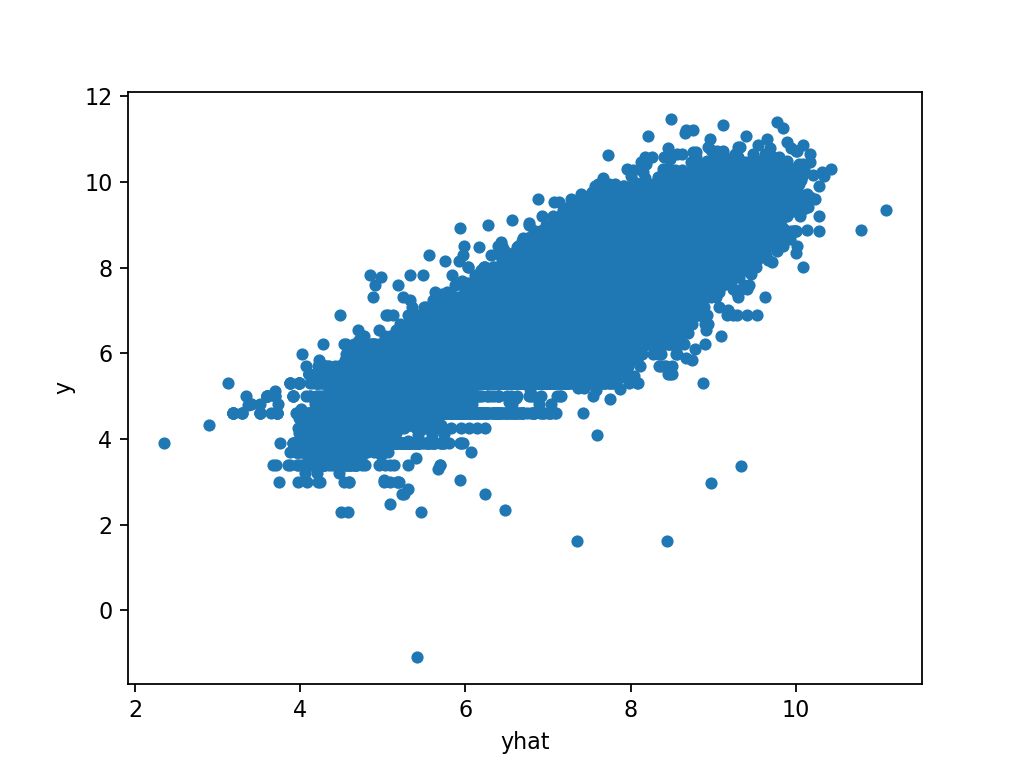

<AxesSubplot:xlabel='yhat', ylabel='y'>

In [14]:
%matplotlib notebook
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

## Parameters

### (Relative) Income Elasticity

In [15]:
result.get_beta().sort_values()

j
Maize (grain)                                            -0.094918
Maize (flour)                                             0.077846
Cassava dry/flour                                         0.088943
Salt                                                      0.187089
Millet and sorghum (flour)                                0.275926
Tea (dry)                                                 0.280608
Maize (green, cob)                                        0.333611
Pasta                                                     0.357335
Sweet potatoes                                            0.362445
Cassava fresh                                             0.382830
Sugar                                                     0.418569
Coconuts                                                  0.437310
Sugarcane                                                 0.468164
Peas, beans, lentils and other pulses                     0.473878
Rice (husked)                                             0.

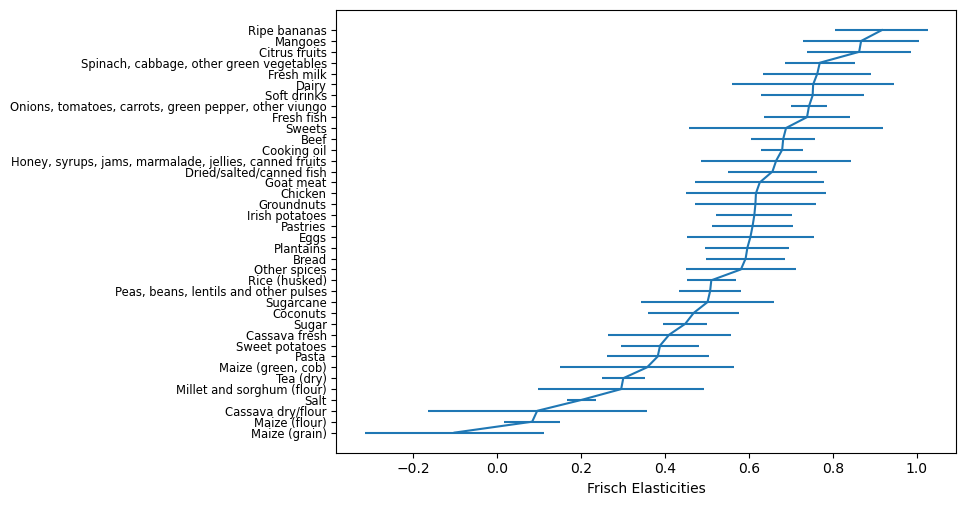

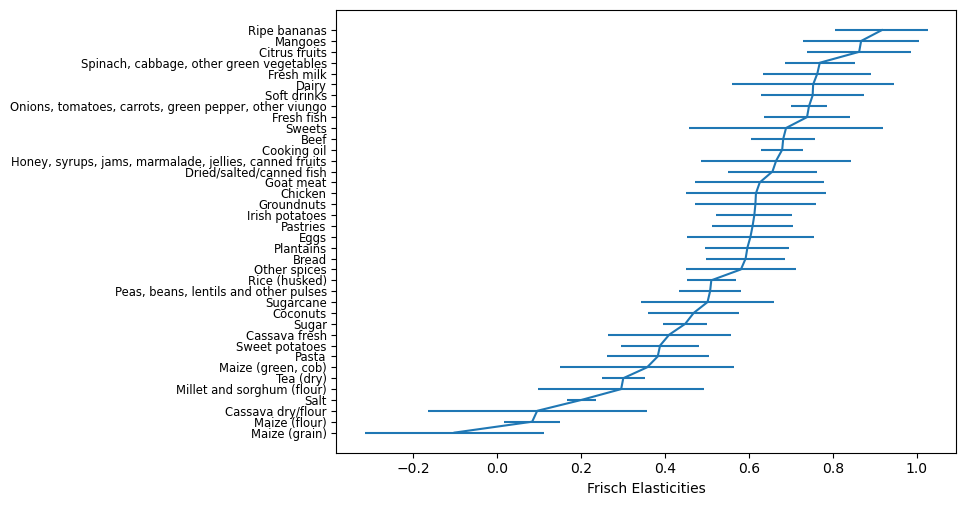

In [16]:
%matplotlib inline
result.graph_beta()

### Household Composition and Estimated Demands¶

In [17]:
result.gamma

k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize,Rural,Constant
j,,,,,,,,,,,,,,,,,
Beef,-0.048644,0.002215,0.027224,0.052433,0.096158,0.044578,0.047516,-0.022719,0.005673,-0.003863,0.086962,0.043165,0.145292,0.144936,0.141515,-0.071538,-0.616013
Bread,-0.016718,0.043636,0.053565,0.064025,0.080639,0.041468,0.051838,-0.010640,0.030879,0.051564,0.086801,0.100933,0.127886,0.105141,0.201297,-0.115842,-0.794924
Cassava dry/flour,0.044957,0.125137,0.037554,0.017019,0.052989,-0.020078,0.108232,0.049136,0.032796,-0.027377,0.106335,0.025484,0.121700,0.158503,0.219262,-0.063549,-0.736184
Cassava fresh,0.068871,0.061303,0.119006,0.049131,0.059969,0.003748,0.163404,0.038110,0.063866,0.088996,0.105309,0.118254,0.073413,0.185801,-0.085184,-0.078522,-0.359515
Chicken,-0.110544,0.047002,-0.008717,0.044839,0.023592,0.066662,0.051282,-0.012666,-0.014649,-0.060434,0.039994,0.039948,0.038684,0.088207,0.214608,-0.047630,-0.619484
Citrus fruits,-0.003171,-0.078816,-0.006599,0.013096,0.036056,0.003837,-0.040397,-0.023174,-0.049518,0.069269,-0.019869,0.050136,0.099090,-0.010212,0.355007,-0.078946,-0.766046
Coconuts,0.070228,0.072141,0.040326,0.056100,0.056670,0.026268,0.083300,0.048861,0.072240,0.080963,0.033717,0.085363,0.129015,0.107767,-0.027680,-0.080495,-0.400689
Cooking oil,-0.024997,0.004419,0.012082,0.076890,0.120196,0.080484,-0.008138,-0.058896,0.018301,0.032440,0.061328,0.062878,0.125309,0.071347,0.096056,-0.015978,-0.467625
Dairy,0.048196,0.073141,0.049023,0.113892,0.058543,-0.074635,0.046990,0.067701,0.000135,0.064330,0.169235,-0.044813,0.177819,0.129286,-0.110953,-0.054866,-0.208763


In [18]:
r = result
xhat = r.predicted_expenditures()
# Implied relative prices
p = np.exp(r.get_Ar())

<IPython.core.display.Javascript object>


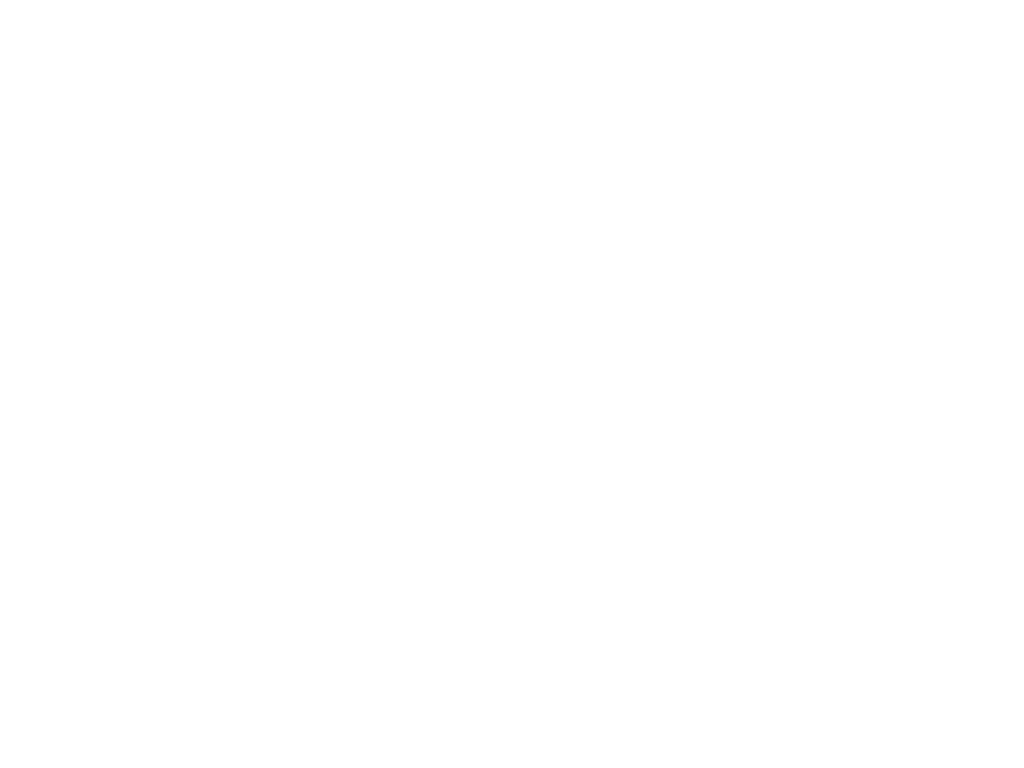

Text(0.5, 1.0, 'Demand Curve (Soft drinks)')

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook

use = 'Soft drinks'
scale = np.linspace(.5,2,20)

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

# Reference prices
pbar = p.xs('2014-15',level='t').groupby('j').mean()
#pbar = pbar[use]

def my_prices(p0,p=pbar,j='Soft drinks'):
    """
    This just changes the price of good j, holding other prices constant
    """
    p = p.copy()
    p.loc[j] = p0
    return p

# Demand for Soft drinks for household at 25% percentile
plt.plot([r.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale, label='25% percentile')

# Demand for Soft drinks for household at median budget
plt.plot([r.demands(xref,my_prices(pbar[use]*s,pbar))[use] for s in scale],scale, label='median budget')

# Demand for Soft drinks for household at 75% percentile
plt.plot([r.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale, label='75% percentile')
plt.legend()
plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")
plt.title(f"Demand Curve ({use})")

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook 

use = 'Maize (flour)'
scale = np.linspace(.5,2,20)

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

# Reference prices
pbar = p.xs('2014-15',level='t').groupby('j').mean()
#pbar = pbar[use]

def my_prices(p0,p=pbar,j='Maize (flour)'):
    """
    This just changes the price of good j, holding other prices constant
    """
    p = p.copy()
    p.loc[j] = p0
    return p

# Demand for Maize (flour) for household at 25% percentile
plt.plot([r.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale, label='25% percentile')

# Demand for Maize (flour) for household at median budget
plt.plot([r.demands(xref,my_prices(pbar[use]*s,pbar))[use] for s in scale],scale, label='median budget')

# Demand for Maize (flour) for household at 75% percentile
plt.plot([r.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale, label='75% percentile')
plt.legend()
plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")
plt.title(f"Demand Curve ({use})")

<IPython.core.display.Javascript object>

In [ ]:
r.demands(20000,pbar).index.tolist()

In [ ]:
fig,ax = plt.subplots()

use = ['Bread','Soft drinks','Dried/salted/canned fish','Pastries','Sweets']

X = np.linspace(xbar.quantile(0.001),xbar.quantile(0.99),20)

for f in use:
    # Different budgets to evaluate demands at.
    ax.plot(X,[r.demands(x,pbar)[use] for x in X])
    
ax.legend(use)
ax.set_xlabel('Budget (Tanzanian Shillings)')
ax.set_ylabel('Estimated Demands (Quantities of [Food] Demanded)')
ax.set_title('Engel Curve for Processed Foods' )

/opt/conda/lib/python3.9/site-packages/consumerdemands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')


Text(0.5, 1.0, 'Engel Curves for Top 10 High Demand Foods')

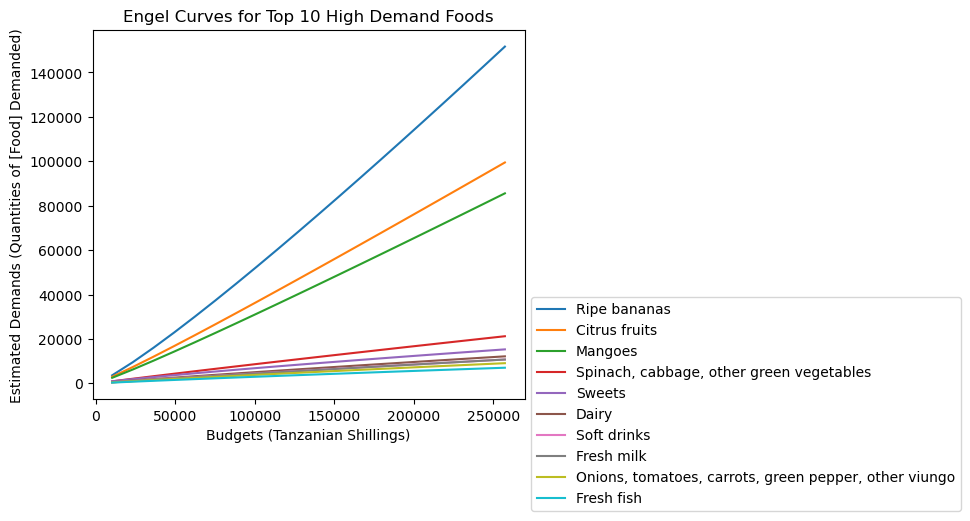

In [26]:
%matplotlib inline
fig,ax = plt.subplots()

# Different budgets to evaluate demands at.
X = np.linspace(xbar.quantile(0.001),xbar.quantile(0.99),20)

# Get the 10 ten demanded foods in order to reduce index
ten_r_demands_xref = r.demands(xref,pbar).sort_values(axis = 0,ascending = False)[:10]

for use in ten_r_demands_xref.index:
    ax.plot(X,[r.demands(x,pbar)[use] for x in X])
    
fig.subplots_adjust(right=0.8)

ax.legend(ten_r_demands_xref.index.tolist(),
    loc="center left",
    bbox_to_anchor=(0.8, 0.1),
    bbox_transform=fig.transFigure,
);

ax.set_xlabel('Budgets (Tanzanian Shillings)')
ax.set_ylabel('Estimated Demands (Quantities of [Food] Demanded)')
ax.set_title('Engel Curves for Top 10 High Demand Foods')